In [269]:
!pip install sktime

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sktime.classification.deep_learning.fcn import FCNClassifier
from copy import copy

import warnings
warnings.filterwarnings('ignore')

In [271]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()

In [272]:
X_ini = np.load("/kaggle/input/neymark-tsc/train_x.npy")
y_ini = np.load("/kaggle/input/neymark-tsc/train_y.npy")
X_test_real = np.load("/kaggle/input/neymark-tsc/test_x.npy")

In [273]:
X_ini.shape

(14667, 187)

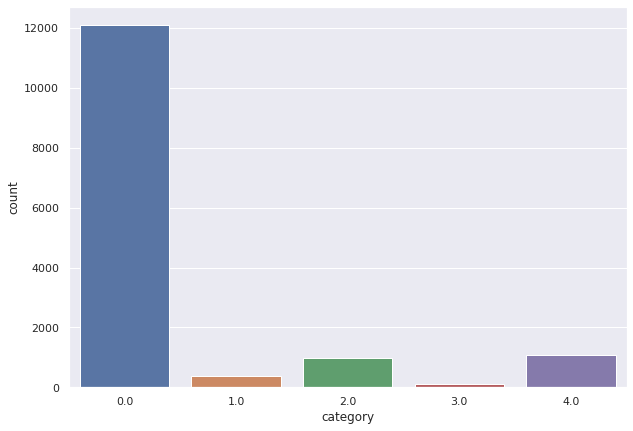

In [274]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x=pd.DataFrame(y)[0])
plt.xlabel("category", size = 12)
plt.show()

In [275]:
df_ini = pd.DataFrame(np.column_stack((X_ini, y_ini)))
df_ini = df_ini.rename(columns={187: 'class'})

In [276]:
cols = df_ini.columns
df_ini['len'] = df_ini[cols].gt(0).sum(axis=1)

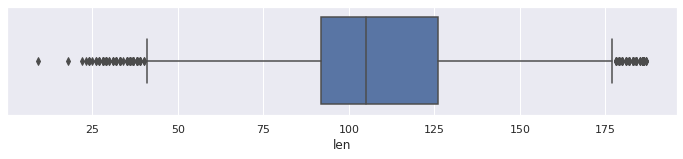

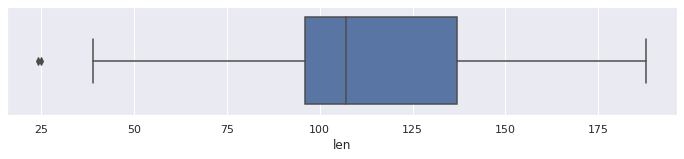

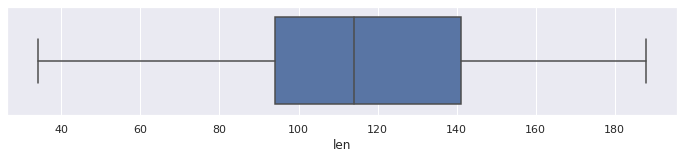

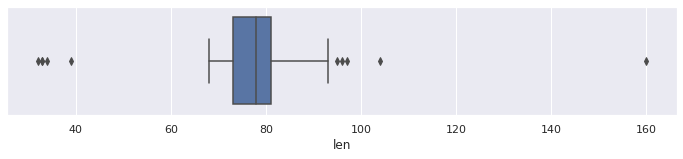

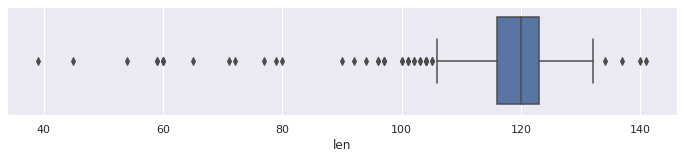

In [277]:
for c in range(5):
    fig, ax = plt.subplots(figsize=(12, 2))
    sns.boxplot(x=df_ini[df_ini['class'] == c]['len'], ax=ax)
    plt.show()

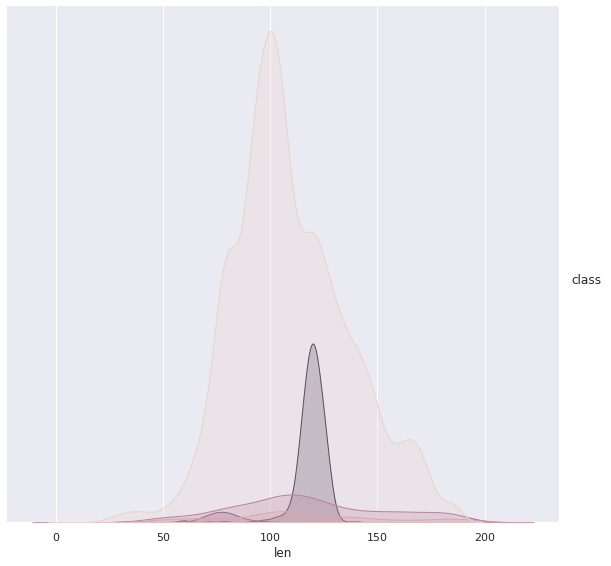

In [278]:
sns.pairplot(df_ini[['class', 'len']], hue='class', corner=True, height=8)
plt.show()

In [279]:
min_level = 0

X = np.delete(X_ini, df_ini[df_ini['len'] <= min_level].index.tolist(), axis=0)
y = np.delete(y_ini, df_ini[df_ini['len'] <= min_level].index.tolist(), axis=0)
X.shape

(14667, 187)

In [280]:
df = copy(df_ini)
df = df[df['len'] > min_level]

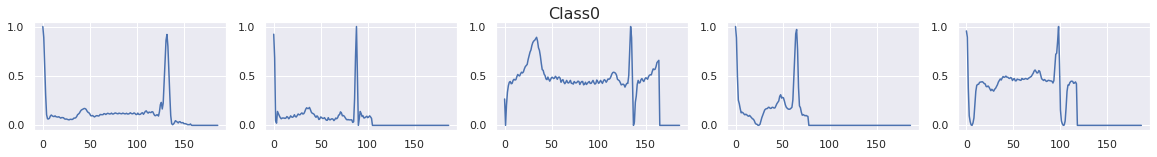

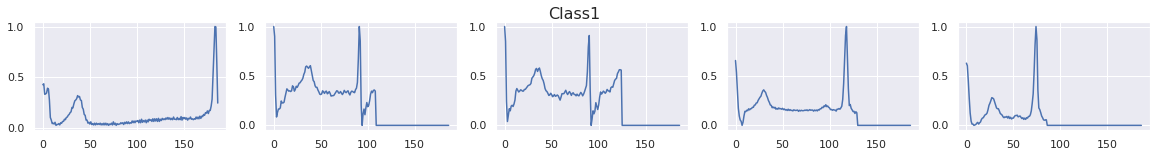

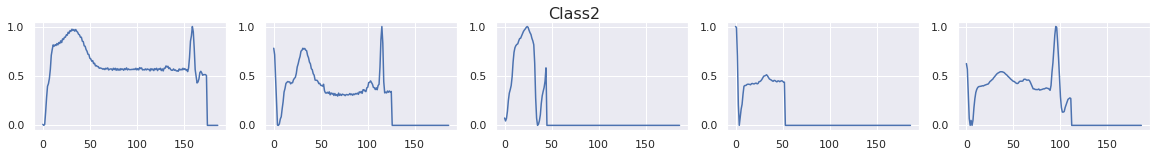

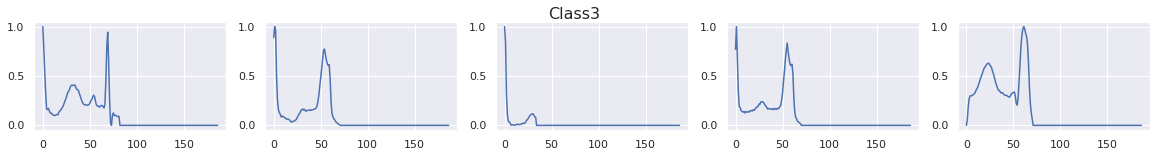

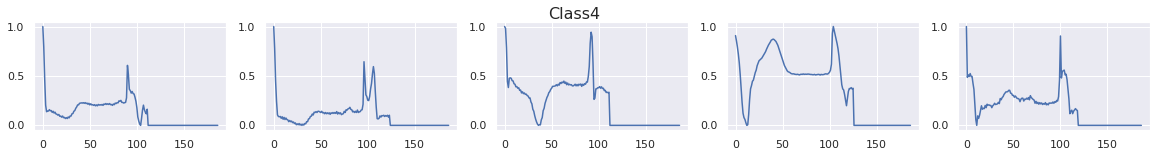

In [281]:
for t in range(5):
  fig, ax = plt.subplots(1, 5, figsize=(20, 2))
  i = 0
  fig.suptitle('Class' + str(t), fontsize=16)
  for c in X[df['class'] == t][:5]:
    sns.lineplot(x=np.arange(0, 187), y=c, ax=ax[i])
    i = i + 1
  plt.show()

In [282]:
X_test_real.shape

(7225, 187)

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [284]:
classifier = FCNClassifier(
    n_epochs=150,
    batch_size=32,
    verbose=False,
    random_state=42,
    activation='softmax'
)
result = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
f1_score(y_test, y_pred, average="macro")

0.8640328220344269

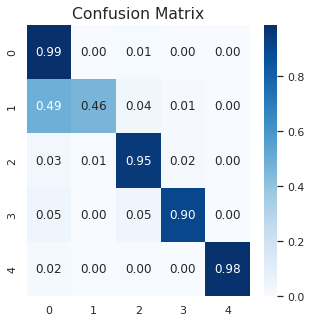

In [285]:
cm_plot(y_test, y_pred)

In [286]:
y_pred = classifier.predict(X_test_real)

In [287]:
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)